<a href="https://colab.research.google.com/github/Abner-source/Tensorflow/blob/main/spamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('SPAM text message 20170820 - Data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.shape

(5572, 2)

In [10]:
data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

<Axes: xlabel='count', ylabel='Category'>

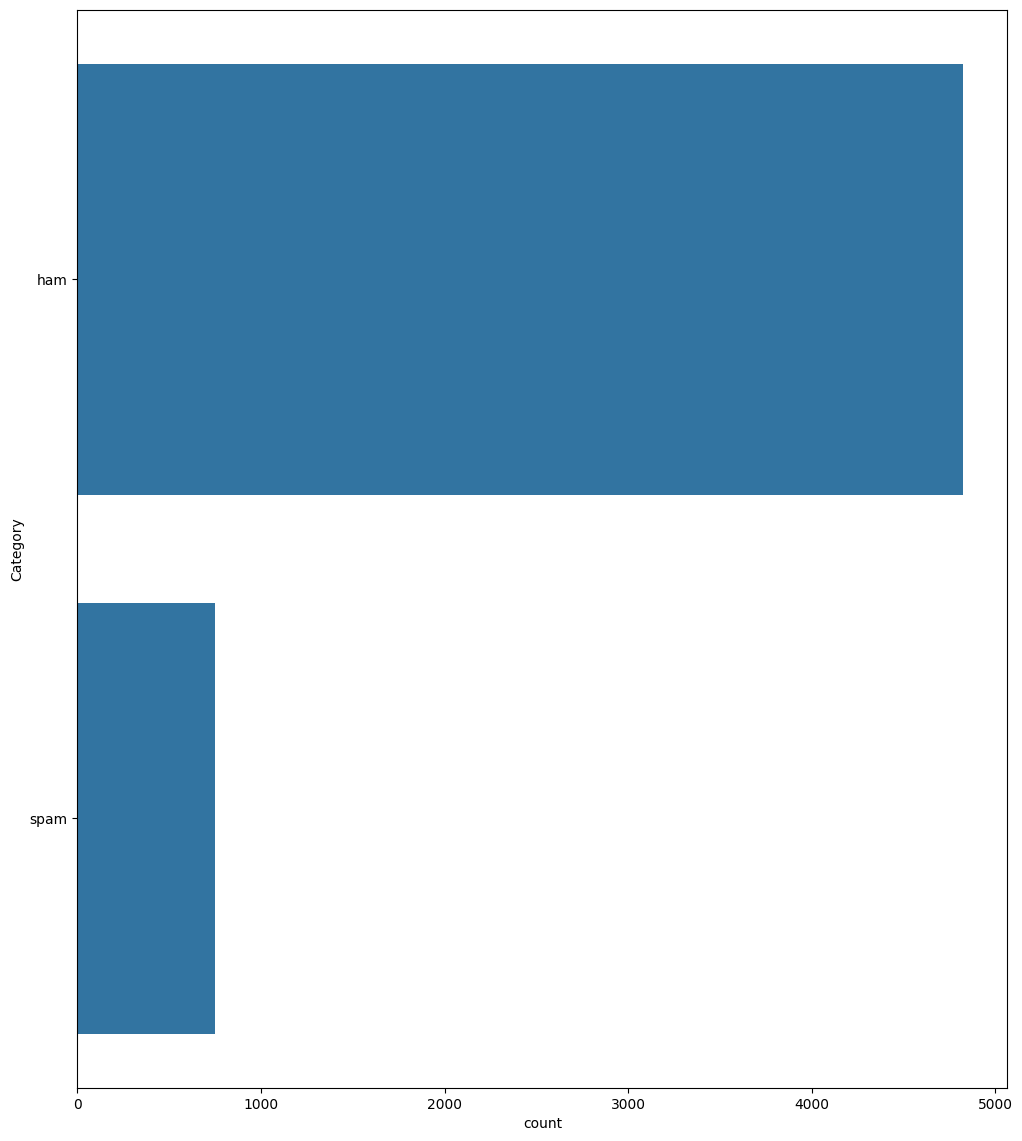

In [11]:
import seaborn as sns
plt.figure(figsize=(12,14))
sns.countplot(data['Category'])

In [12]:
ham_msg=data[data.Category=='ham']
spam_msg=data[data.Category=='spam']

In [13]:
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)
print(ham_msg.shape,spam_msg.shape)

(747, 2) (747, 2)


Text(0.5, 0, 'mesage category')

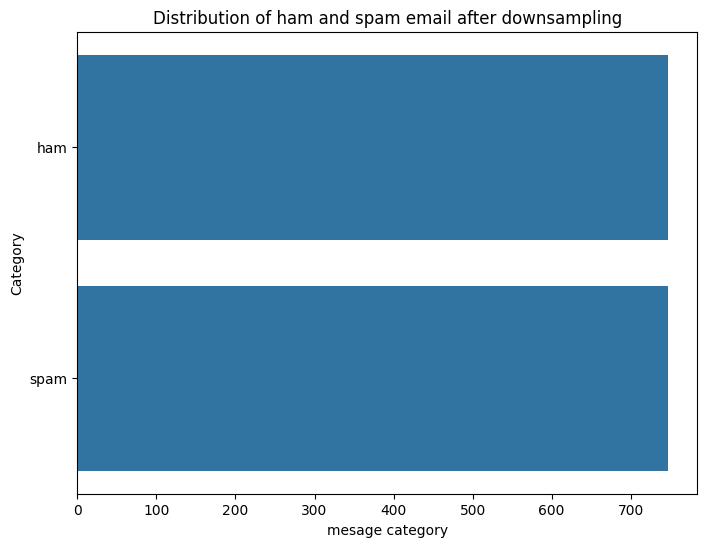

In [14]:
balanced_data=pd.concat([ham_msg, spam_msg]).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.Category)
plt.title('Distribution of ham and spam email after downsampling')
plt.xlabel('mesage category')


In [15]:
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})
train_msg,test_msg,train_labels,test_labels=train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=432)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [17]:
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [18]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'is': 10,
 'for': 11,
 'and': 12,
 'now': 13,
 '2': 14,
 'free': 15,
 'or': 16,
 'have': 17,
 'on': 18,
 'in': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 'are': 23,
 '4': 24,
 'from': 25,
 'with': 26,
 'mobile': 27,
 'text': 28,
 'me': 29,
 'my': 30,
 'this': 31,
 'get': 32,
 'just': 33,
 'stop': 34,
 'no': 35,
 'claim': 36,
 'reply': 37,
 'that': 38,
 'only': 39,
 'prize': 40,
 'so': 41,
 'www': 42,
 'it': 43,
 'will': 44,
 'we': 45,
 'our': 46,
 'be': 47,
 'send': 48,
 'out': 49,
 'new': 50,
 'not': 51,
 'do': 52,
 'but': 53,
 'cash': 54,
 'nokia': 55,
 'at': 56,
 'can': 57,
 'go': 58,
 'won': 59,
 '150p': 60,
 'please': 61,
 'if': 62,
 '1': 63,
 'urgent': 64,
 'uk': 65,
 'all': 66,
 'who': 67,
 "i'm": 68,
 'tone': 69,
 'been': 70,
 'win': 71,
 't': 72,
 'what': 73,
 'week': 74,
 'msg': 75,
 'guaranteed': 76,
 'contact': 77,
 'service': 78,
 'when': 79,
 'has': 80,
 'up': 81,
 'co': 82,
 'com

In [20]:
padding_type='post'
truncate_type='post'
Training_sequence=token.texts_to_sequences(train_msg)
Training_pad=pad_sequences(Training_sequence,maxlen=max_len,padding=padding_type,truncating=truncate_type)

In [21]:
Testing_sequence=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_sequence,maxlen=max_len,padding=padding_type,truncating=truncate_type)

In [23]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,16,input_length=50),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [24]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [25]:
epoch=30
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
history=model.fit(Training_pad,train_labels,epochs=epoch,validation_data=(Testing_pad,test_labels),callbacks=[early_stop],verbose=2)

Epoch 1/30
38/38 - 5s - 122ms/step - accuracy: 0.5038 - loss: 0.6749 - val_accuracy: 0.4615 - val_loss: 0.6593
Epoch 2/30
38/38 - 0s - 4ms/step - accuracy: 0.5674 - loss: 0.6309 - val_accuracy: 0.6488 - val_loss: 0.6086
Epoch 3/30
38/38 - 0s - 4ms/step - accuracy: 0.7155 - loss: 0.5796 - val_accuracy: 0.8027 - val_loss: 0.5558
Epoch 4/30
38/38 - 0s - 8ms/step - accuracy: 0.8075 - loss: 0.5268 - val_accuracy: 0.8495 - val_loss: 0.4922
Epoch 5/30
38/38 - 0s - 8ms/step - accuracy: 0.8527 - loss: 0.4563 - val_accuracy: 0.8829 - val_loss: 0.4197
Epoch 6/30
38/38 - 0s - 4ms/step - accuracy: 0.8611 - loss: 0.3908 - val_accuracy: 0.8829 - val_loss: 0.3618
Epoch 7/30
38/38 - 0s - 8ms/step - accuracy: 0.8904 - loss: 0.3379 - val_accuracy: 0.9164 - val_loss: 0.3020
Epoch 8/30
38/38 - 0s - 4ms/step - accuracy: 0.9130 - loss: 0.2876 - val_accuracy: 0.9231 - val_loss: 0.2612
Epoch 9/30
38/38 - 0s - 9ms/step - accuracy: 0.9314 - loss: 0.2476 - val_accuracy: 0.9197 - val_loss: 0.2253
Epoch 10/30
38/38

In [26]:
model.evaluate(Testing_pad,test_labels)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9417 - loss: 0.1328 


[0.10904333740472794, 0.9598662257194519]

Text(0, 0.5, 'accuracy')

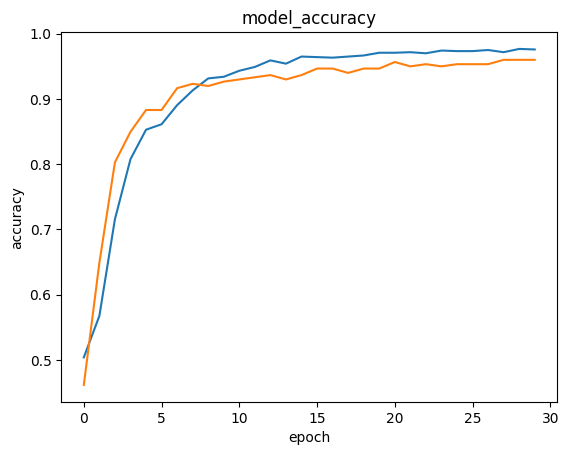

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')